## Water Use Per Well and Water:Oil Ratio Analysis

**Theodore Barnhart | tbarnhart@usgs.edu | 20170727**

In [14]:
printfigs=False
plt.style.use('ggplot')

In [15]:
dat = pd.read_excel('./data/water_use_compilation_v2.xlsx',sheetname='data',skiprows=5)

In [16]:
plays = dat.play.unique()
regions = np.arange(1,len(plays)+1)

In [17]:
def set_region(play):
    for p,reg in zip(plays,regions):
        if p == play:
            return reg
    

In [18]:
dat['region'] = dat.play.map(set_region)

In [19]:
dat.loc[dat.measure=='gal/well','value'] /= 1000000 # gal > millions of gallons

## Review Wide Plots:

### Show plots of water use per well and water:oil ratios for all plays found in the literature review

In [33]:
mxs.as_matrix()

array([  3,  50,  95,  27,  52,  54, 207, 209,  74,  92, 216,  94,  71])

In [36]:
measure = 'gal/well'
mxs = dat.loc[(dat.measure==measure) & (dat.process=='HF')].groupby('play').value.idxmin()
tmp = dat.loc[(dat.measure==measure) & (dat.process=='HF')]
tmp.loc[mxs.as_matrix()]

,process,value,tag,study,play,state,au,measure,type,source1,source2,source3,source4,period,span_strt,span_nd,method,note,region
3,HF,6.000000,max,Haines et al. [2017],Bakken,NaN,NaN,gal/well,oil,IHS,NaN,NaN,NaN,NaN,NaN,NaN,modeled,NaN,1.0
50,HF,6.208043,max,Clark et al. [2013],Barnett,NaN,NaN,gal/well,NaN,INTEK,EPA,API,NaN,NaN,NaN,NaN,modeled,NaN,4.0
95,HF,0.134000,mean,Freyman [2014],California,NaN,NaN,gal/well,oil,FF,PW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
27,HF,4.920000,val,Scanlon et al. [2014],Eagle Ford,NaN,DG,gal/well,NaN,IHS,FF,PW,ST,NaN,2009.0,2013.0,obs,NaN,2.0
52,HF,6.709970,max,Clark et al. [2013],Fayetteville,NaN,NaN,gal/well,NaN,INTEK,EPA,API,NaN,NaN,NaN,NaN,modeled,NaN,5.0
54,HF,8.823347,max,Clark et al. [2013],Haynesville,NaN,NaN,gal/well,NaN,INTEK,EPA,API,NaN,NaN,NaN,NaN,modeled,NaN,6.0
207,HF,13.208600,mean,Johnson and Johnson [2012],Horn River,NaN,NaN,gal/well,NaN,BCOGC,IHS,geoLOGIC,NaN,NaN,NaN,NaN,obs,from Vengosh et al. [2014],14.0
209,HF,10.038536,max,Kargbo et al. [2010],Marcellus,NaN,NaN,gal/well,NaN,ProChemTech,NaN,NaN,NaN,NaN,NaN,2010.0,obs,from Vengosh et al. [2014],3.0
74,HF,0.070000,median,Kondash and Vengosh [2015],Monterey-Temblor,NaN,NaN,gal/well,oil,FF,EPA,ST,diffuse,NaN,NaN,NaN,obs,NaN,10.0
92,HF,5.131542,median,Gallegos et al. [2015],National,NaN,NaN,gal/well,gas,IHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0


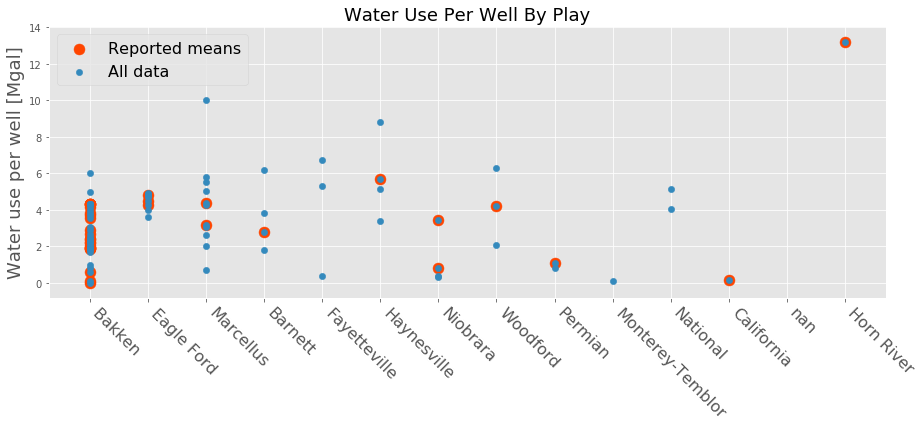

In [7]:
measure = 'gal/well'
dat.loc[(dat.measure==measure) & (dat.tag=='mean') & (dat.process=='HF')].plot.scatter('region','value',s=120,c='orangered',figsize=(15,5),label='Reported means')
ax = plt.gca()
dat.loc[(dat.measure==measure) & (dat.process=='HF')].plot.scatter('region','value',s=40,figsize=(15,5),ax=ax,label='All data')
plt.xticks(regions,plays,rotation=-45, fontsize=16, ha='left');
plt.xlabel('')
plt.ylabel('Water use per well [Mgal]', fontsize=18)
plt.legend(fontsize=16)
plt.title('Water Use Per Well By Play', fontsize=18)
if printfigs:
    plt.savefig('./figures/water_per_well_allplays.pdf',bbox_inches='tight')

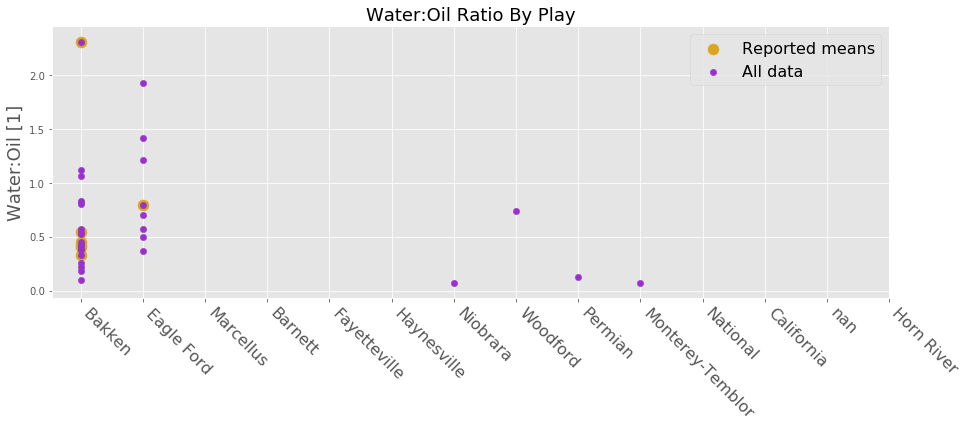

In [8]:
measure = 'water:oil'
dat.loc[(dat.measure==measure) & (dat.tag=='mean')].plot.scatter('region','value',s=120,c='goldenrod',figsize=(15,5),label='Reported means')
ax = plt.gca()
dat.loc[(dat.measure==measure)].plot.scatter('region','value',s=40,c='darkorchid',figsize=(15,5),ax=ax,label='All data')
plt.xticks(regions,plays,rotation=-45, fontsize=16, ha='left');
plt.xlabel('')
plt.ylabel('Water:Oil [1]', fontsize=18)
plt.legend(fontsize=16)
plt.title('Water:Oil Ratio By Play', fontsize=18)
if printfigs:
    plt.savefig('./figures/water2oil_allplays.pdf',bbox_inches='tight')

## Focus on the Bakken Play

### Show Bakken data by reference

In [9]:
bakken_refs = dat.loc[dat.region==1].study.unique()
bakken_codes = np.arange(1,len(bakken_refs)+1)

In [10]:
def set_bakken_refs(ref):
    for r,code in zip(bakken_refs,bakken_codes):
        if r==ref:
            return code
        

In [11]:
bakken = dat.loc[dat.region==1].copy()
bakken['refcode'] = bakken.study.map(set_bakken_refs)

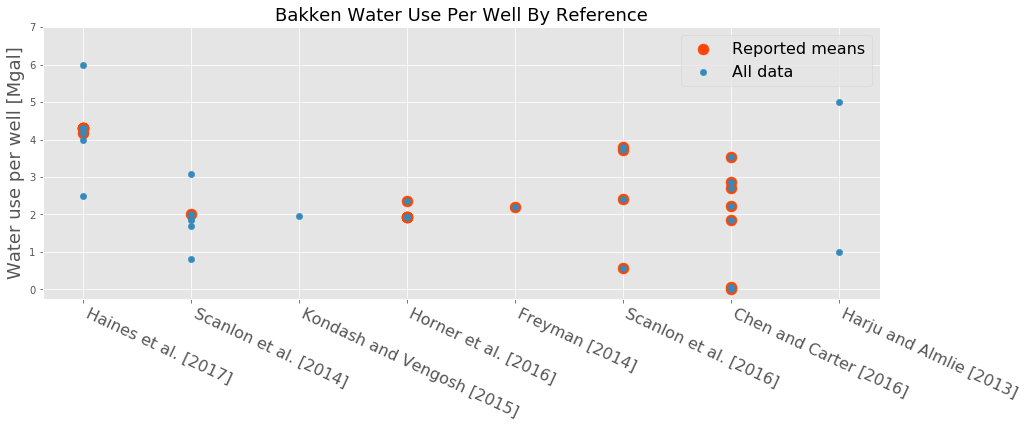

In [12]:
measure = 'gal/well'
bakken.loc[(bakken.measure==measure) & (bakken.tag=='mean') & (bakken.process=='HF')].plot.scatter('refcode','value',s=120,c='orangered',figsize=(15,5),label='Reported means')
ax = plt.gca()
bakken.loc[(bakken.measure==measure)& (bakken.process=='HF')].plot.scatter('refcode','value',s=40,figsize=(15,5),ax=ax,label='All data')
plt.xticks(bakken_codes,bakken_refs,rotation=-25, fontsize=16, ha='left');
plt.xlabel('')
plt.ylabel('Water use per well [Mgal]', fontsize=18)
plt.ylim(-0.25,7)
plt.legend(fontsize=16,loc='upper right')
plt.title('Bakken Water Use Per Well By Reference', fontsize=18)
if printfigs:
    plt.savefig('./figures/water_per_well_bakken.pdf',bbox_inches='tight')

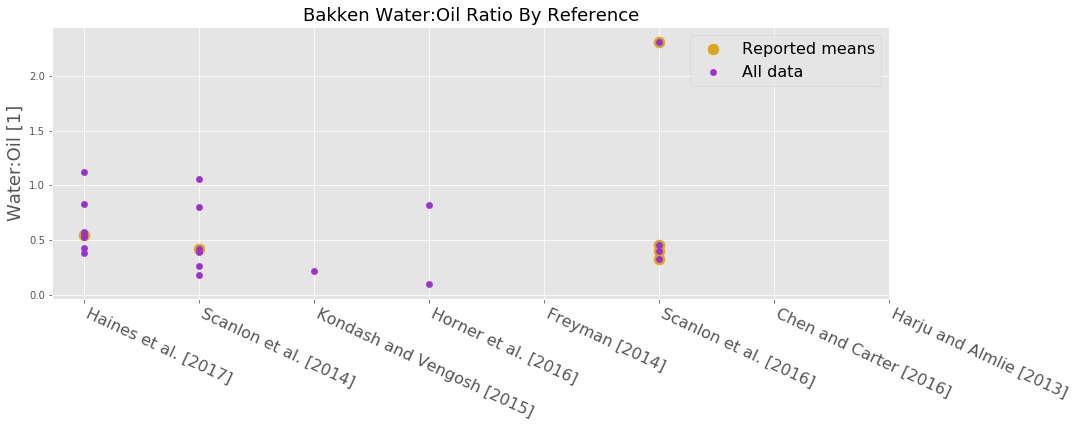

In [13]:
measure = 'water:oil'
bakken.loc[(bakken.measure==measure) & (bakken.tag=='mean')].plot.scatter('refcode','value',s=120,c='goldenrod',figsize=(15,5),label='Reported means')
ax = plt.gca()
bakken.loc[(bakken.measure==measure)].plot.scatter('refcode','value',s=40,c='darkorchid',figsize=(15,5),ax=ax,label='All data')
plt.xticks(bakken_codes,bakken_refs,rotation=-25, fontsize=16, ha='left');
plt.xlabel('')
plt.ylabel('Water:Oil [1]', fontsize=18)
plt.legend(fontsize=16)
plt.title('Bakken Water:Oil Ratio By Reference', fontsize=18)
if printfigs:
    plt.savefig('./figures/water2oil_bakken.pdf',bbox_inches='tight')

## Look at Bakken Water Use by Year

In [14]:
out = bakken.loc[(np.isnan(bakken.period)==0) & (bakken.measure=='gal/well') & (bakken.process=='HF') & (bakken.value != 0)].groupby(by='period').value.describe()
out.to_csv('./data/bakken_annual_data.csv',index=True,index_label='year')
out

,count,mean,std,min,25%,50%,75%,max
period,,,,,,,,
2005.0,1.0,0.580000,NaN,0.580000,0.580000,0.580000,0.580000,0.580000
2008.0,1.0,1.920200,NaN,1.920200,1.920200,1.920200,1.920200,1.920200
2009.0,2.0,0.998406,1.306980,0.074232,0.536319,0.998406,1.460494,1.922581
2010.0,2.0,2.394743,0.668329,1.922164,2.158453,2.394743,2.631033,2.867323
2011.0,3.0,2.687274,1.397254,1.840222,1.880912,1.921601,3.110801,4.300000
2012.0,3.0,2.967051,1.156645,2.228027,2.300576,2.373126,3.336563,4.300000
2013.0,2.0,3.500051,1.131299,2.700102,3.100077,3.500051,3.900026,4.300000
2014.0,3.0,3.850308,0.400755,3.530923,3.625461,3.720000,4.010000,4.300000
2015.0,1.0,4.300000,NaN,4.300000,4.300000,4.300000,4.300000,4.300000


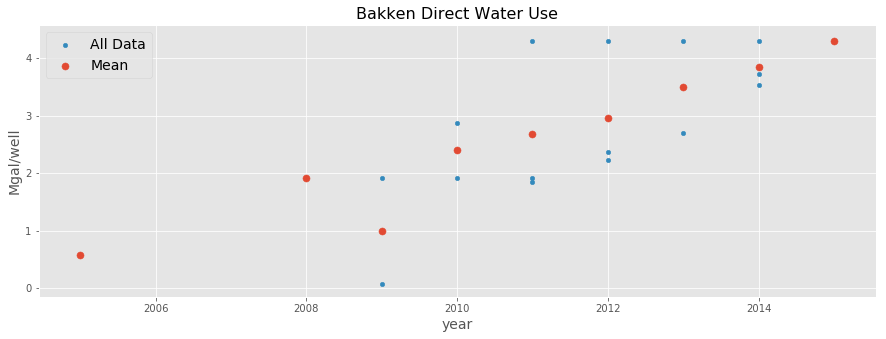

In [15]:
plt.figure()
bakken.loc[(np.isnan(bakken.period)==0) & (bakken.measure=='gal/well') & (bakken.process=='HF') & (bakken.value != 0)].plot.scatter('period','value',
            label='All Data',figsize=(15,5));
plt.scatter(out.index,out['mean'],s=50,label='Mean');
plt.ylabel('Mgal/well', fontsize=14);
plt.xlabel('year', fontsize=14);
plt.legend(fontsize=14);
plt.title('Bakken Direct Water Use', fontsize=16);

In [16]:
bakken.loc[(np.isnan(bakken.period)==0) & (bakken.measure=='gal/well') & (bakken.process=='HF'),['value','period','study','source1','source2','source3']].sort_values('period')

,value,period,study,source1,source2,source3
101,0.580000,2005.0,Scanlon et al. [2016],IHS,FF,NDIC
86,1.920200,2008.0,Horner et al. [2016],FF,NDDMR,NaN
113,0.000000,2008.0,Chen and Carter [2016],FF,NaN,NaN
127,0.074232,2009.0,Chen and Carter [2016],FF,NaN,NaN
87,1.922581,2009.0,Horner et al. [2016],FF,NDDMR,NaN
141,2.867323,2010.0,Chen and Carter [2016],FF,NaN,NaN
88,1.922164,2010.0,Horner et al. [2016],FF,NDDMR,NaN
15,4.300000,2011.0,Haines et al. [2017],IHS,NaN,NaN
155,1.840222,2011.0,Chen and Carter [2016],FF,NaN,NaN
89,1.921601,2011.0,Horner et al. [2016],FF,NDDMR,NaN
